A <b>Graph</b> is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

Install it by this command:

<b>conda install anaconda::networkx</b>

In [1]:
import networkx as nx

#### Nodes

In [2]:
G = nx.Graph()

In [3]:
#add one node at a time
G.add_node(1)

In [4]:
# add nodes from any iterable container, such as a list
G.add_nodes_from([2,3])

In [5]:
#add nodes along with node attributes if your container yields 2-tuples of the form (node, node_attribute_dict)
G.add_nodes_from([(4,{"color":"red"}),(5,{"color":"green"})])

In [6]:
#Nodes from one graph can be incorporated into another: G now contains the nodes of H as nodes of G. 
H = nx.path_graph(10)
G.add_nodes_from(H)

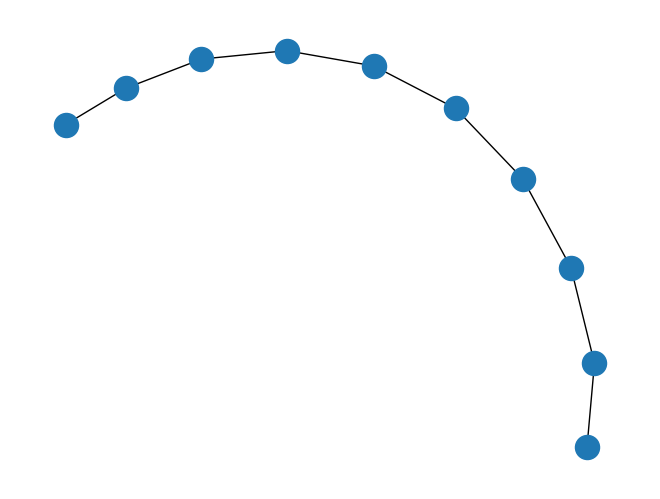

In [7]:
nx.draw(H)

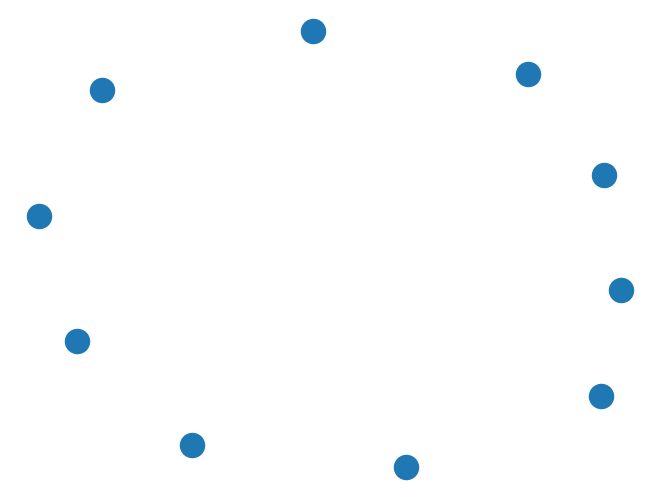

In [8]:
nx.draw(G)

In [9]:
#you could use the graph H as a node in G.This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more.
G.add_node(H)

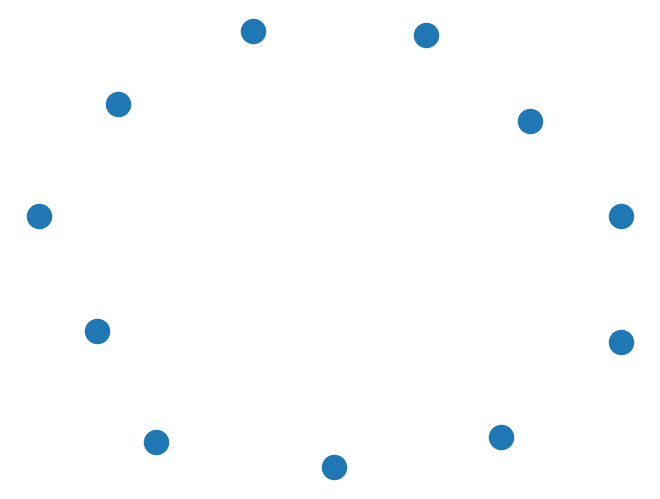

In [10]:
nx.draw(G)

#### Edges

In [11]:
G.add_edge(1,2)

In [12]:
e = (2,3)
G.add_edge(*e)   # unpack edge tuple*, without *, will produce an error

In [13]:
G.add_edges_from([(1,2),(1,3)])

In [14]:
G.add_edge(3,4,weight=3.1415)

In [15]:
G.add_edges_from([(4,5),(5,8)],color='red')

An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415})

In [16]:
G.add_edges_from([(5,6,{"color":"blue"}),(6,7,{"weight":8})])

In [17]:
G.add_edge(1,10)

In [18]:
G[1][10]['weight'] = 4.7

In [19]:
G.add_edge(1,9)

In [20]:
G.edges[1,9]['weights'] = 5.7

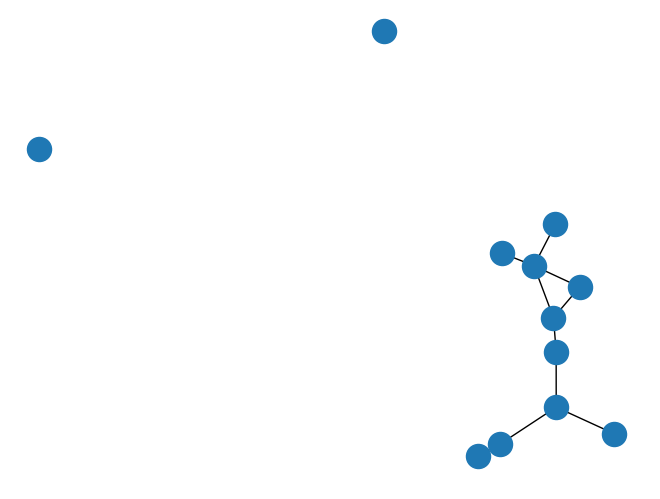

In [21]:
nx.draw(G)

There are no complaints when adding existing nodes or edges.

In [22]:
G.add_edges_from(H.edges)

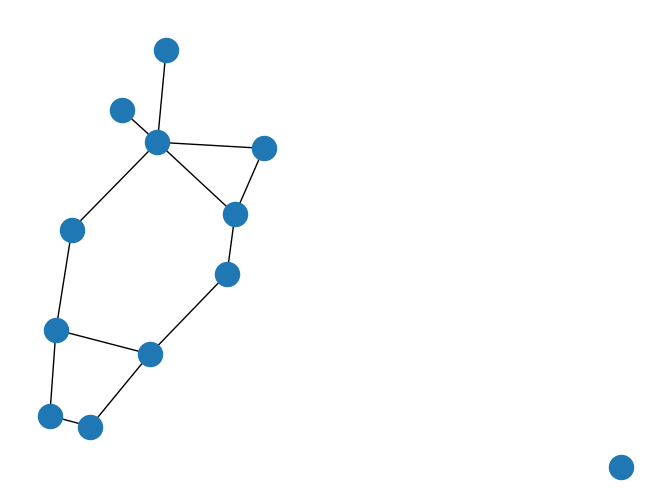

In [23]:
nx.draw(G)

Four basic graph properties facilitate reporting:<b> G.nodes, G.edges, G.adj and G.degree</b>. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph

In [24]:
list(G.nodes)

[1,
 2,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 10]

In [25]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 10),
 (1, 9),
 (1, 0),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 8),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

In [26]:
G.number_of_nodes()

12

In [27]:
G.number_of_edges()

13

In [28]:
## list(G.neighbors(1))
list(G.adj[1])

[2, 3, 10, 9, 0]

In [29]:
# the number of edges incident to 1
G.degree[1]

5

Removing all nodes and edges

In [30]:
G.clear()

In [31]:
G.add_edges_from([(1,2),(2,3)])

In [32]:
# adds node "spam"
G.add_node('spam')

In [33]:
 # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_nodes_from('spam')

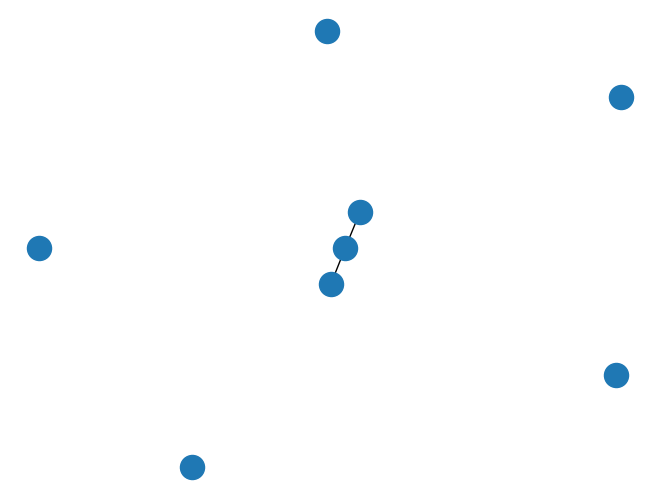

In [34]:
nx.draw(G)

The order of adjacency reporting (e.g., <b>G.adj, G.successors, G.predecessors</b>) is the order of edge addition. However, the order of G.edges is the order of the adjacencies which includes both the order of the nodes and each node’s adjacencies. 

In [35]:
DG = nx.DiGraph()

In [36]:
DG.add_edge(2,1)
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)

In [37]:
DG.is_directed()

True

In [38]:
list(DG.successors(2))

[1, 4]

In [39]:
list(DG.edges())

[(2, 1), (2, 4), (1, 3), (1, 2)]

In [40]:
list(DG.predecessors(4))

[2]

In [41]:
G.edges([2,1])

EdgeDataView([(2, 1), (2, 3)])

In [42]:
G.degree([1,'spam'])

DegreeView({1: 1, 'spam': 0})

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods <b>Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from()</b>

In [43]:
G.remove_node(2)

In [44]:
G.remove_nodes_from('spam')

In [45]:
G.edges()

EdgeView([])

In [47]:
G.add_edge(1,2)

In [48]:
G.remove_edge(1,2)

In [49]:
G.add_edge(1,2)

In [50]:
G.edges()

EdgeView([(1, 2)])

In [51]:
# create a DiGraph using the connections from G
H = nx.DiGraph(G)

In [52]:
list(H.edges)

[(1, 2), (2, 1)]

In [53]:
 # create a graph from an edge list
edgelist = [(0,1),(1,2),(2,3)]
H = nx.Graph(edgelist)

In [54]:
list(H.edges)

[(0, 1), (1, 2), (2, 3)]

In [55]:
# create a Graph dict mapping nodes to nbrs
adjaceny_dict = {0:(1,2),1:(0,2),2:(0,1)}
H = nx.Graph(adjaceny_dict)

In [56]:
list(H.edges)

[(0, 1), (0, 2), (1, 2)]

In [57]:
Hi = nx.DiGraph(adjaceny_dict)

In [58]:
list(Hi.edges)

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]

Accessing edges and neighbors

In [59]:
G = nx.Graph([(1,2,{'color':"yellow"})])

In [60]:

G[1]

AtlasView({2: {'color': 'yellow'}})

In [61]:
G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [62]:
G[1][2]

{'color': 'yellow'}

In [63]:
G.edges[1,2]

{'color': 'yellow'}

In [64]:
G[1][2]["color"]

'yellow'

In [65]:
G[1][2]["color"] = 'blue'

In [66]:
G.edges[1,2]['color'] = 'rose'

In [68]:
list(G.adjacency())

[(1, {2: {'color': 'rose'}}), (2, {1: {'color': 'rose'}})]

In [69]:
G.adj.items()

ItemsView(AdjacencyView({1: {2: {'color': 'rose'}}, 2: {1: {'color': 'rose'}}}))

In [70]:
FG = nx.Graph()

In [71]:
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

Fast examination of all (node, adjacency) pairs is achieved using <b>G.adjacency()</b>, or <b>G.adj.items()</b>. Note that for undirected graphs, adjacency iteration sees each edge twice.

In [72]:
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt<0.5:
            print(f"({n},{nbr},{wt:.3})")

(1,2,0.125)
(2,1,0.125)
(3,4,0.375)
(4,3,0.375)


In [73]:
for (u,v,wt) in FG.edges.data('weight'):
    if wt<0.5:
        print(f"({u},{v},{wt:.3}")

(1,2,0.125
(3,4,0.375


In [74]:
#there are graph attributes and node attributes and edge attributes
#Graph attributes
G = nx.Graph(day="Friday")

In [75]:
G.graph

{'day': 'Friday'}

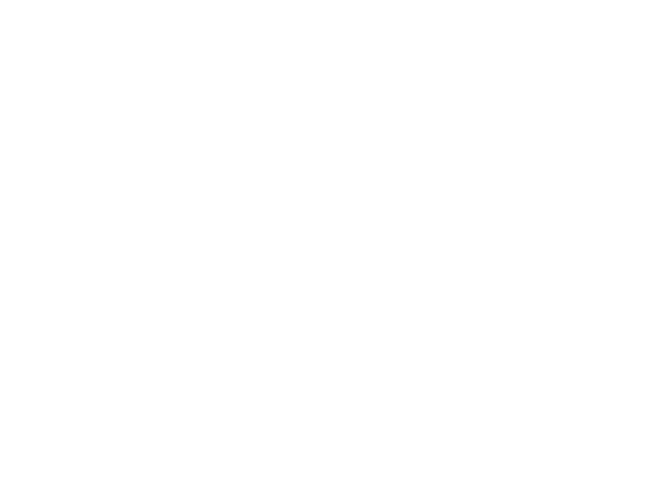

In [76]:
# empty graph; there are not nodes
nx.draw(G)

In [77]:
G.graph['day'] = "Monday"

In [78]:
#Node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [79]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [80]:
#Edge Attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [81]:
#Directed graphs
#DiGraph.degree reports the sum of DiGraph.in_degree 
#DiGraph.out_degree reports the sum of the out edges weights
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5),(1, 5, 2.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

3.0

In [82]:
DG.degree(1,weight='weight')

3.75

In [83]:
list(DG.successors(1)) # is equal to list(DG.neighbors(1)); if you want to work on a directed class--> one way

[2, 5]

In [84]:
list(DG.predecessors(1))

[3]

In [85]:
DG.is_directed()

True

In [86]:
G.is_directed()

False

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using <b>Graph.to_undirected()</b> or with the following:

In [87]:
H = nx.Graph(DG)  # create an undirected graph H from a directed graph G

In [88]:
H.is_directed()

False

### Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., <b>MultiGraph.degree()</b> we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [89]:
MG = nx.MultiDiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

In [90]:
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [91]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

In [92]:
nx.shortest_path(GG,1,3)

[1, 2, 3]

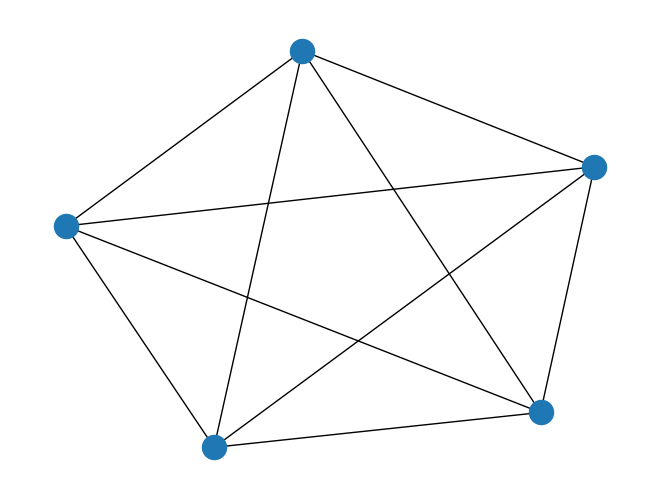

In [93]:
k_5 = nx.complete_graph(5)
nx.draw(k_5)

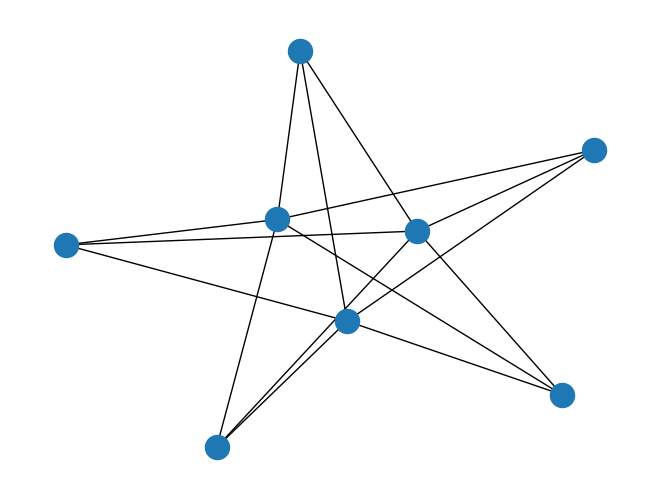

In [94]:
k_3_5 = nx.complete_bipartite_graph(3,5)
nx.draw(k_3_5)

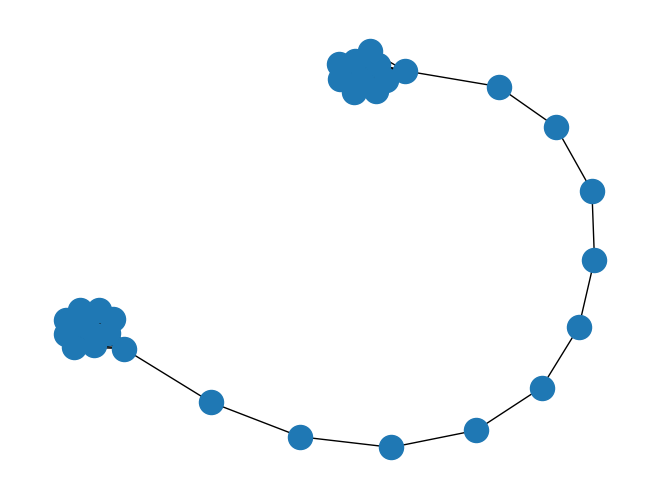

In [95]:
barbel = nx.barbell_graph(10,10)
nx.draw(barbel)

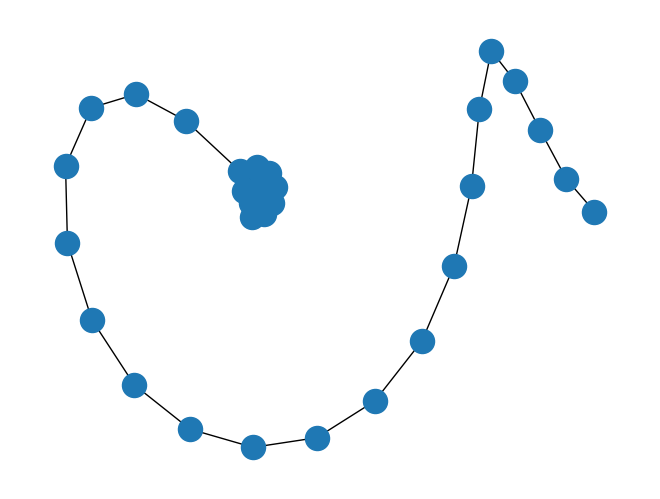

In [96]:
lolli = nx.lollipop_graph(10,20)
nx.draw(lolli)

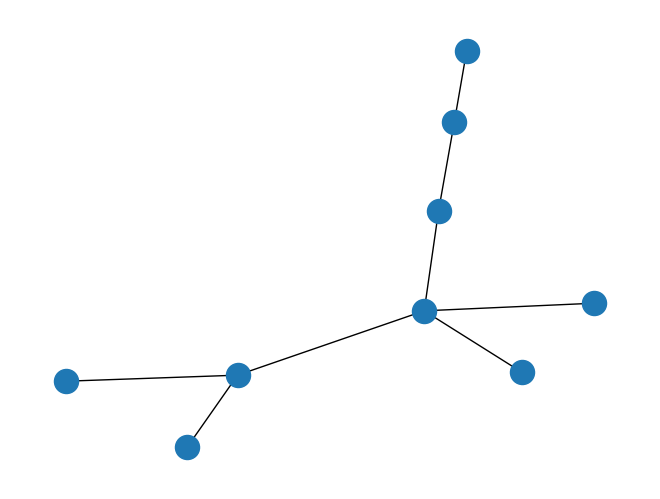

In [97]:
#generate randomly as an example random_lobster(n, p1, p2[, seed])    Returns a random lobster graph.
\
red = nx.random_lobster(10, 0.4, 0.3)
nx.draw(red)

 Reading a graph stored in a file using common graph formats

NetworkX supports many popular formats, such as edge lists, adjacency lists, GML, GraphML, LEDA and others.

<b>nx.write_gml(red, "path.to.file")</b>

<b>
mygraph = nx.read_gml("path.to.file")

</b>

In [98]:
#Analyzing graphs
list(nx.connected_components(G))

[{1, 2, 3, 4, 5}]

In [99]:
G.degree()

DegreeView({1: 1, 3: 2, 2: 2, 4: 2, 5: 1})

In [100]:
sorted(d for n,d in G.degree())

[1, 1, 2, 2, 2]

In [101]:
nx.clustering(G)

{1: 0, 3: 0, 2: 0, 4: 0, 5: 0}

In [102]:
import matplotlib.pyplot as plt

### Drawing graphs

In [103]:
G = nx.petersen_graph()

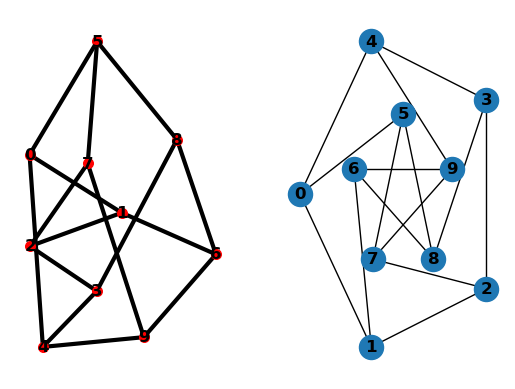

In [104]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True,font_weight='bold',node_color='r',node_size=48,width=3)

subax2 = plt.subplot(122)
nx.draw_shell(G,nlist=[range(5,10),range(5)],with_labels=True, font_weight='bold')
#nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

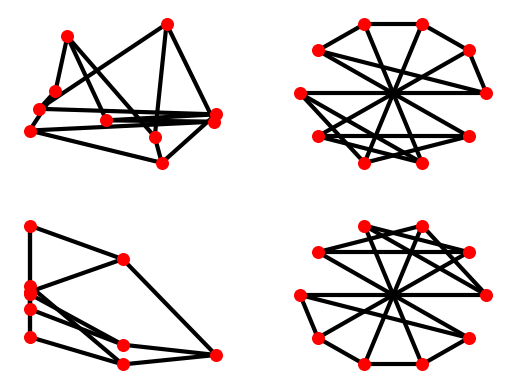

In [105]:
options= {
    'node_color':'red',
    'node_size':70,
    'width':3
}
subax1 = plt.subplot(221)
nx.draw_random(G,**options)

subax1 = plt.subplot(222)
nx.draw_circular(G,**options)

subax1 = plt.subplot(223)
nx.draw_spectral(G,**options)

subax1 = plt.subplot(224)
nx.draw_shell(G,**options)

### Reference:
https://networkx.org/documentation/stable/tutorial.html#multigraphs